- Title: Characters Data Analysis
- By: Jose Heras

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sys
import os

Constant definition:

In [2]:
FILE_PATH = "./data/characters_stats.csv"
ROOT_PATH = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))

if ROOT_PATH not in sys.path:
    sys.path.append(ROOT_PATH)


2. Importing CSV into DataFrame:

In [3]:
characters_df = pd.read_csv(FILE_PATH)

Data cleaning:

In [4]:
lower_case_columns = {n: n.lower() for n in characters_df.columns.to_list()}

characters_df.rename(columns=lower_case_columns, inplace=True)

3. Show the first record:

In [5]:
characters_df.head(1)

,name,alignment,intelligence,strength,speed,durability,power,combat,total
0,3-D Man,good,50,31,43,32,25,52,233


4. Show the number of rows and columns:

In [6]:
print(f"There are {characters_df.shape[0]} rows and {characters_df.shape[1]} columns in the dataframe.")

There are 611 rows and 9 columns in the dataframe.


5. Find the amount of characters who fall under each alignment:

<Axes: xlabel='alignment'>

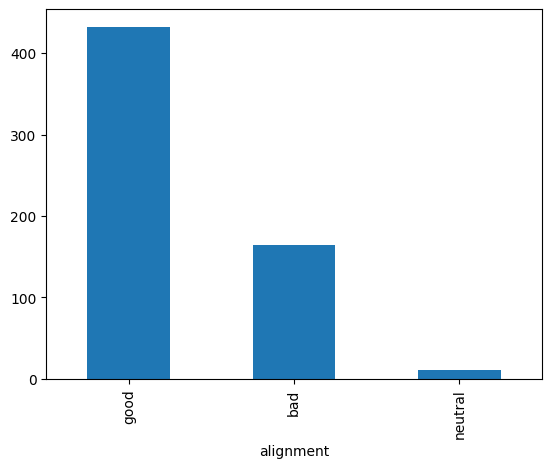

In [7]:
characters_df['alignment'].value_counts().plot(kind="bar")

6. Find only the good alignment characters:

In [8]:
good_alignment_df = characters_df[characters_df['alignment']=='good']

7. Show only the first five records from the previous bullet point:

In [9]:
good_alignment_df.head()

,name,alignment,intelligence,strength,speed,durability,power,combat,total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


8. Select the top five good characters with the highest speed score:

In [10]:
good_alignment_df.nlargest(n=5, columns='speed')[['name', 'speed']]

,name,speed
85,Black Bolt,100
229,Flash I,100
230,Flash II,100
231,Flash III,100
232,Flash IV,100


9. Select the top five good characters with maximum power score:

In [11]:
good_alignment_df.nlargest(n=5, columns='power')[['name', 'power']]

,name,power
69,Beta Ray Bill,100
70,Beyonder,100
85,Black Bolt,100
129,Cable,100
185,Deadman,100


10. How many characters with good alignment have a power score of 100:

In [12]:
good_alignment_with_power_score_100_df = good_alignment_df.query('power == 100')

print(f"There are {good_alignment_with_power_score_100_df.shape[0]} good characters with a power level of 100.")

There are 33 good characters with a power level of 100.


11. Display the shape of the previous point:

In [13]:
good_alignment_df[good_alignment_df['power'] == 100].shape

(33, 9)

12. Show all records from point 10:

In [14]:
good_alignment_with_power_score_100_df.reset_index(drop=True)

,name,alignment,intelligence,strength,speed,durability,power,combat,total
0,Beta Ray Bill,good,63,80,35,95,100,84,457
1,Beyonder,good,88,100,23,100,100,56,467
2,Black Bolt,good,75,67,100,84,100,56,482
3,Cable,good,88,48,23,56,100,80,395
4,Deadman,good,50,10,33,100,100,42,335
5,Doctor Fate,good,81,16,25,80,100,50,352
6,Doctor Strange,good,100,10,12,84,100,60,366
7,Dr Manhattan,good,88,32,42,95,100,42,399
8,Firestorm,good,50,53,58,56,100,42,359
9,Goku,good,56,100,75,90,100,100,521


13. Retrieve the first five records of good characters with highest power score:

In [15]:
good_alignment_with_power_score_100_df.head()

,name,alignment,intelligence,strength,speed,durability,power,combat,total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335


14. Bar plot with good characters and their max power score:

[Text(0.5, 0, 'Name'),
 Text(0, 0.5, 'Power'),
 Text(0.5, 1.0, 'Good characters with Max Power Score')]

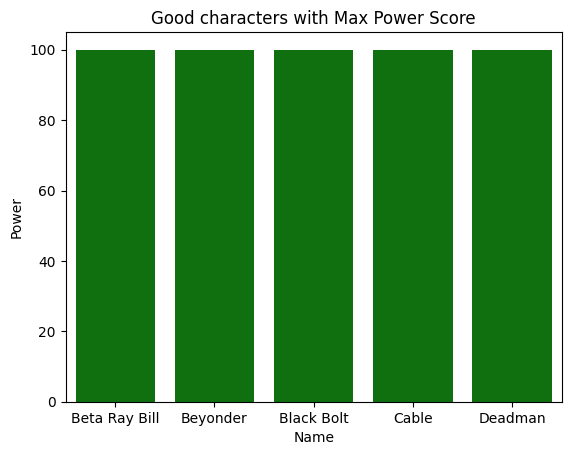

In [16]:
data = good_alignment_with_power_score_100_df.head()[['name', 'power']]

# Bar Plot
sns_graph = sns.barplot(data=data, x='name', y='power', color='green')
sns_graph.set(xlabel='Name', ylabel='Power', title='Good characters with Max Power Score')

15. Extract characters with bad alignment:

In [17]:
bad_alignment_df = characters_df[characters_df['alignment'] == 'bad']

16. Show first five records from point 15:

In [18]:
bad_alignment_df.head()

,name,alignment,intelligence,strength,speed,durability,power,combat,total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5


17. Bad alignment characters with highest speed score (Top 5):

In [19]:
bad_alignment_df.nlargest(n=5, columns='speed')

,name,alignment,intelligence,strength,speed,durability,power,combat,total
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
535,Superboy-Prime,bad,94,100,100,100,100,85,579
610,Zoom,bad,50,10,100,28,72,28,288
242,General Zod,bad,94,100,96,100,94,95,579


18. Bad alignment characters with highest score of intelligence (Top 5):

In [20]:
bad_alignment_df.nlargest(n=5, columns='intelligence')

,name,alignment,intelligence,strength,speed,durability,power,combat,total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
29,Apocalypse,bad,100,100,33,100,100,60,493
122,Brainiac,bad,100,28,63,90,60,75,416
194,Doctor Doom,bad,100,32,20,100,93,84,429
315,Joker,bad,100,10,12,56,22,90,290


19. Bad characters in terms of total score (Top 5):

In [21]:
bad_alignment_df.nlargest(n=5, columns='total')

,name,alignment,intelligence,strength,speed,durability,power,combat,total
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
16,Amazo,bad,75,100,100,100,100,100,575
203,Dormammu,bad,88,95,83,100,100,80,546
201,Doomsday,bad,88,80,67,120,100,90,545


20. Distribution of good alignment characters in terms of speed (Histogram):

In [22]:
# Helper function aimed to draws diagrams for next two point
def draw_histogram(title, data, xlabel, ylabel, figsize=(10,5)) -> None:
    plt.figure(figsize=figsize)
    sns_graph = sns.histplot(data=data)
    sns_graph.set(xlabel=xlabel, ylabel=ylabel, title=title)

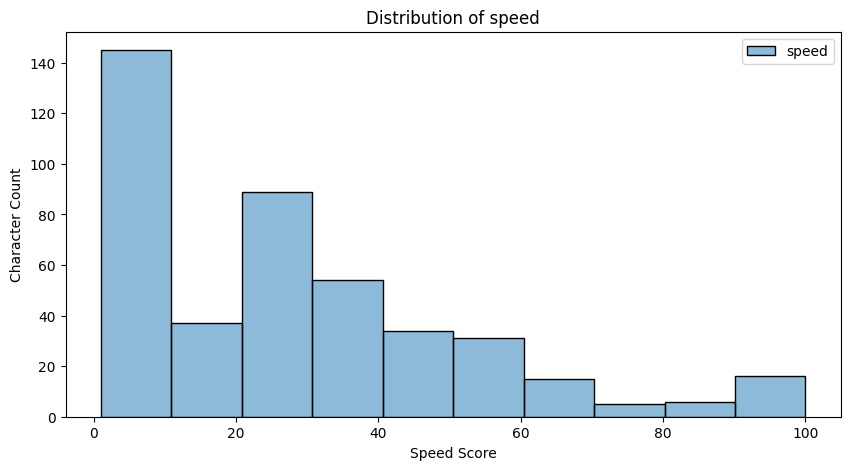

In [23]:
data = good_alignment_df[['name', 'speed']]
title = "Distribution of speed"
xlabel = 'Speed Score'
ylabel = 'Character Count'

draw_histogram(title=title, xlabel=xlabel, ylabel=ylabel, data=data,)


21. Distribution of bad alignment characters in terms of combat (Histogram):

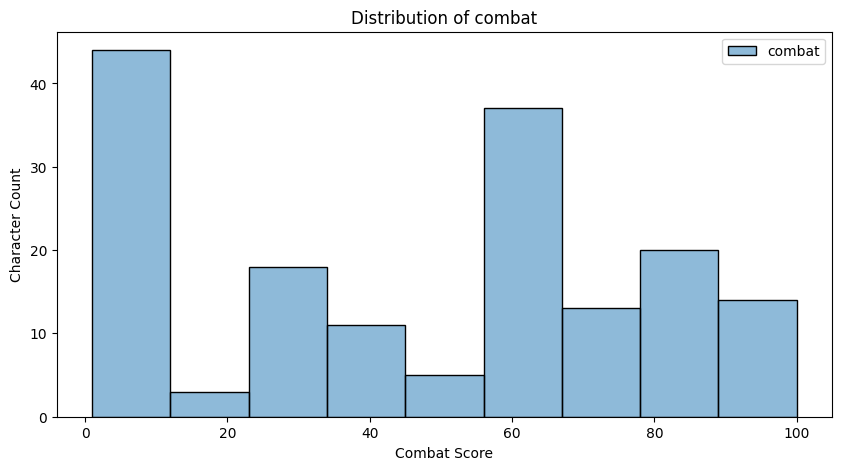

In [24]:
data = bad_alignment_df[['name', 'combat']]
title = "Distribution of combat"
xlabel = 'Combat Score'
ylabel = 'Character Count'

draw_histogram(title=title, xlabel=xlabel, ylabel=ylabel, data=data)

Insights:

Stats comparison between good and bad alignment characters:

- Filtering out characters who do not have reliable stats

In [25]:
characters_missing_scores = characters_df.nsmallest(n=178, columns='intelligence')

characters_with_scores_df = characters_df.nlargest(n=characters_df.shape[0] - characters_missing_scores.shape[0], columns='intelligence')
characters_with_scores_df

,name,alignment,intelligence,strength,speed,durability,power,combat,total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
24,Ant-Man,good,100,10,23,28,32,32,225
29,Apocalypse,bad,100,100,33,100,100,60,493
61,Batman,good,100,18,27,42,37,100,324
122,Brainiac,bad,100,28,63,90,60,75,416
...,...,...,...,...,...,...,...,...,...
333,Krypto,good,9,80,100,90,72,40,391
508,Solomon Grundy,bad,9,93,13,100,78,30,323
202,Doppelganger,bad,8,63,60,95,62,84,372
533,Super Moos,good,8,1,1,10,65,40,125


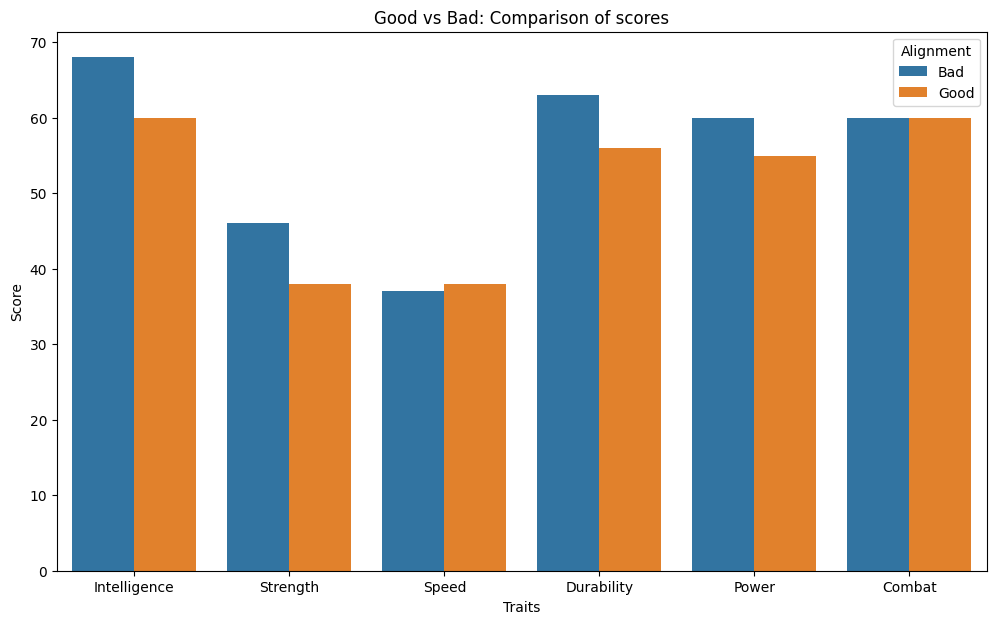

In [26]:
x, y, hue = 'Traits', 'Score', 'alignment'
title = 'Good vs Bad: Comparison of scores'

data = characters_with_scores_df[characters_with_scores_df['alignment'] != "neutral"][characters_with_scores_df.columns[1:characters_with_scores_df.shape[1] - 1]].groupby('alignment').mean().round(decimals=0).reset_index()
data = pd.melt(frame=data, id_vars=[hue], value_vars=data.columns[1:].to_list(), var_name=x, value_name=y)
data.loc[:, x] = data[x].str.capitalize()
data.loc[:, hue] = data[hue].str.capitalize()

plt.figure(figsize=(12,7))
sns_graph = sns.barplot(data=data, hue=hue, x=x, y=y)
sns_graph.set(title=title)
plt.legend().set_title(hue.capitalize())


Comparison of stats between Neutral and Non-Neutral Characters

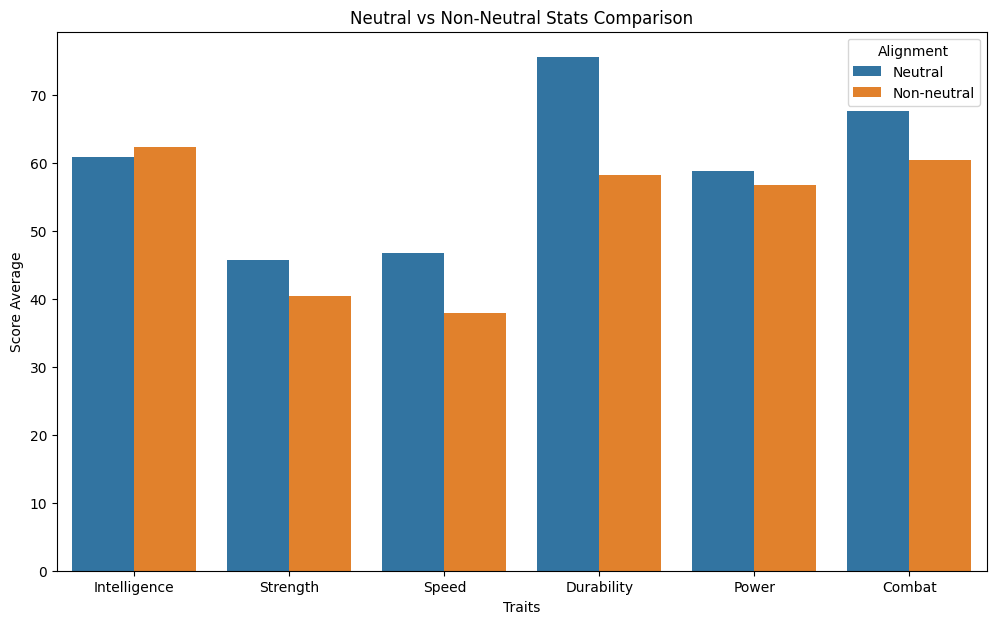

In [27]:
title = "Neutral vs Non-Neutral Stats Comparison"
x, y, hue= "Traits", "Score Average", 'alignment'

data = characters_with_scores_df[characters_with_scores_df.columns[1:8]]
data.loc[(data['alignment'] == 'good') | (data['alignment'] == 'bad'), 'alignment'] = 'non-neutral'
data = data.groupby('alignment').mean().reset_index()
data = pd.melt(frame=data, id_vars=[hue], value_vars=data.columns[1:].to_list(), value_name=y, var_name=x)
data.loc[:, x] = data[x].str.capitalize()
data.loc[:, hue] = data[hue].str.capitalize()

plt.figure(figsize=(12, 7))
sns_graph = sns.barplot(data=data, hue=hue, x=x, y=y)
sns_graph.set(title=title)
plt.legend().set_title(hue.capitalize())



Comparison of stats between two characters:

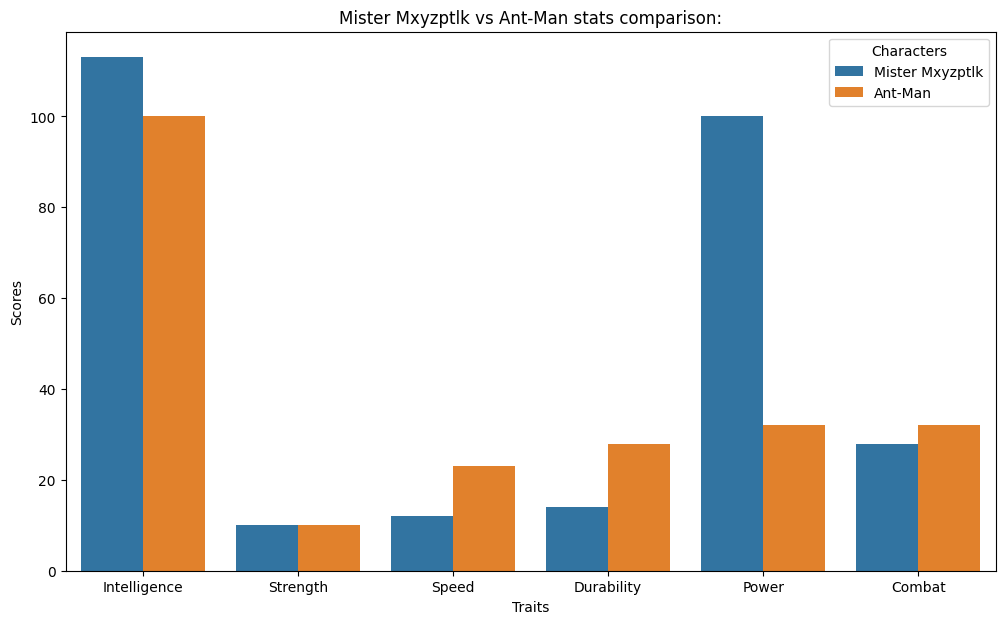

In [28]:
fields = characters_with_scores_df.columns.to_list()
fields.remove('alignment')

character_one = characters_with_scores_df.iloc[0]
character_two = characters_with_scores_df.iloc[1]

title = f"{character_one['name']} vs {character_two['name']} stats comparison:"
x, y, hue = 'Traits', 'Scores', 'name'

data = pd.DataFrame([character_one[fields], character_two[fields]])
data = pd.melt(frame=data, id_vars='name', value_vars=fields[1:len(fields) - 1], value_name=y, var_name=x)
data.loc[:,x] = data[x].str.capitalize()

plt.figure(figsize=(12, 7))
sns_graph = sns.barplot(data=data, hue=hue, x=x, y=y)
sns_graph.set(title=title)
plt.legend().set_title("Characters")

Correlation between all Traits

Text(0.5, 1.0, 'Correlation of traits')

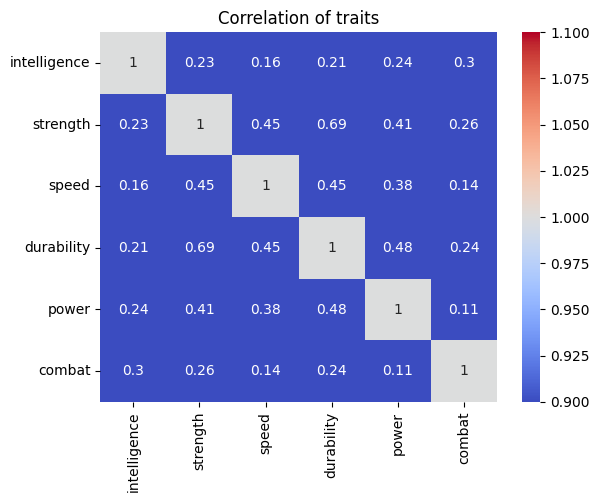

In [29]:
data = characters_with_scores_df[characters_with_scores_df.columns[2: characters_with_scores_df.shape[1] - 1]].corr()

sns.heatmap(data=data, annot=True, cmap='coolwarm', vmin=1, vmax=1)
plt.title("Correlation of traits")

Using external module to retrieve data from web and build a character card:

In [30]:

from IPython.display import display, HTML
from character_card import get_character_card


In [39]:
character_name = "Joker"
card = get_character_card(name=character_name)
display(HTML(card))